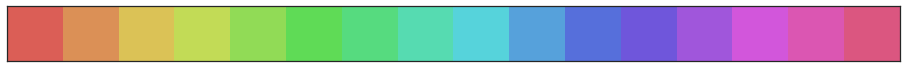

In [42]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=False)
matplotlib.rcParams['svg.fonttype'] = 'none'
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

sys.path.insert(0, '/home/bay001/projects/codebase/rbp-maps/maps/')
from density import Map
from density import ReadDensity
from density import normalization_functions
from density import RDPlotter
from density import LineObject as dline
from peak import LineObject as pline
from peak import PeakPlotter


sns.set_style("white")
sns.set_context("talk", font_scale=1.4)

sns.palplot(sns.color_palette("hls", 16))
colors = sns.color_palette("hls", 16)
density_colors = [colors[0], colors[9], 'black']
peak_colors = [colors[1], colors[8], 'black']

In [43]:
density_dir = '/home/bay001/projects/gabe_qc_20170612/data/'

rbfox2_density_included_s = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.1.RBFOX2-BGHLV26-HepG2-included-upon-knockdown.normed_matrix.txt')
rbfox2_density_excluded_s = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.1.RBFOX2-BGHLV26-HepG2-excluded-upon-knockdown.normed_matrix.txt')
rbfox2_density_native_cass_s = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.1.HepG2_native_cassette_exons.normed_matrix.txt')

rbfox2_density_included_e = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.2.RBFOX2-BGHLV26-HepG2-included-upon-knockdown.normed_matrix.txt')
rbfox2_density_excluded_e = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.2.RBFOX2-BGHLV26-HepG2-excluded-upon-knockdown.normed_matrix.txt')
rbfox2_density_native_cass_e = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.2.HepG2_native_cassette_exons.normed_matrix.txt')

In [44]:
# define lines
from collections import defaultdict
entropy = defaultdict(dict)
subtraction = defaultdict(dict)

entropy['included'] = {
    'matrix':rbfox2_density_included_e,
    'color':density_colors[0]
}
entropy['excluded'] = {
    'matrix':rbfox2_density_excluded_e,
    'color':density_colors[1]
}
entropy['background'] = {
    'matrix':rbfox2_density_native_cass_e,
    'color':density_colors[2]
}

subtraction['included'] = {
    'matrix':rbfox2_density_included_s,
    'color':density_colors[0]
}

subtraction['excluded'] = {
    'matrix':rbfox2_density_excluded_s,
    'color':density_colors[1]
}

subtraction['background'] = {
    'matrix':rbfox2_density_native_cass_s,
    'color':density_colors[2]
}

In [45]:
d = entropy

density_incl = dline.LineObject(
    event_matrix=pd.read_table(d['included']['matrix'], sep=',', index_col=0),
    annotation='Included upon knockdown',
    conf=0.95,
    color=d['included']['color'],
    min_event_threshold=100
)
density_excl = dline.LineObject(
    event_matrix=pd.read_table(d['excluded']['matrix'], sep=',', index_col=0),
    annotation='Excluded upon knockdown',
    conf=0.95,
    color=d['excluded']['color'],
    min_event_threshold=100
)
density_bg = dline.LineObject(
    event_matrix=pd.read_table(d['background']['matrix'], sep=',', index_col=0),
    annotation='Native cassettes',
    conf=0.95,
    color=d['background']['color'],
    min_event_threshold=100
)

((113, 1400), 'Included upon knockdown (113 events)')
((138, 1400), 'Excluded upon knockdown (138 events)')
((2555, 1400), 'Native cassettes (2555 events)')


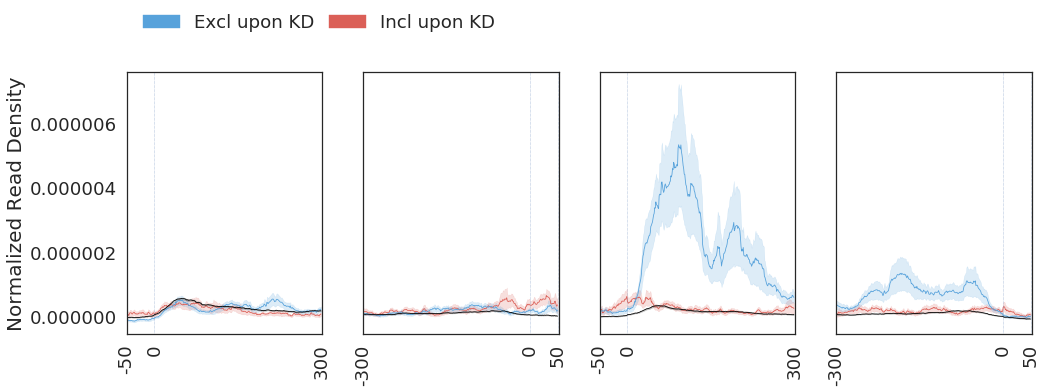

In [46]:
import matplotlib.patches as mpatches

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 5))

axs = [ax1, ax2, ax3, ax4]

RDPlotter.plot_se([density_incl, density_excl, density_bg], axs, density_colors) # density_bg
ax1.set_ylabel("Normalized Read Density")

plt.tight_layout()

incl_density_patch = mpatches.Patch(color=d['included']['color'], label='Incl upon KD')
excl_density_patch = mpatches.Patch(color=d['excluded']['color'], label='Excl upon KD')

leg = axs[0].legend(
    bbox_to_anchor=(1., 1.25), loc=1, mode="expand",
    handles=[incl_density_patch, excl_density_patch],
    borderaxespad=0., ncol=2
)

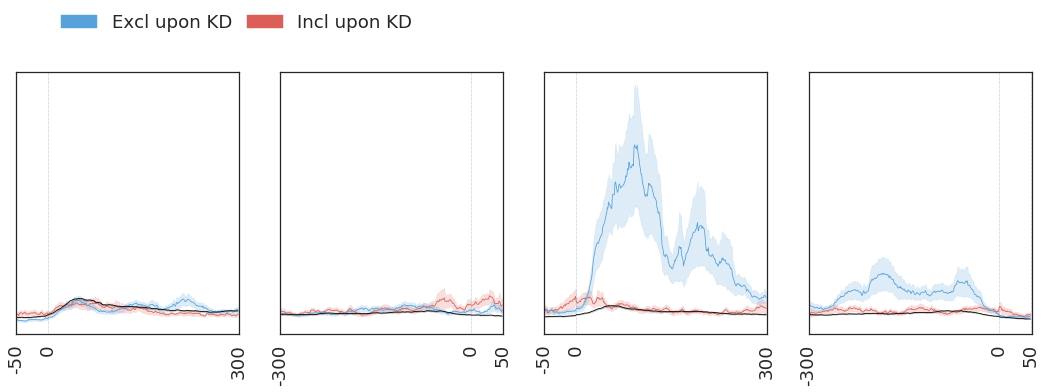

In [47]:
import matplotlib.patches as mpatches

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 5))

axs = [ax1, ax2, ax3, ax4]

RDPlotter.plot_se([density_incl, density_excl, density_bg], axs, density_colors) # density_bg
ax1.yaxis.set_visible(False)

plt.tight_layout()

incl_density_patch = mpatches.Patch(color=d['included']['color'], label='Incl upon KD')
excl_density_patch = mpatches.Patch(color=d['excluded']['color'], label='Excl upon KD')

leg = axs[0].legend(
    bbox_to_anchor=(1., 1.25), loc=1, mode="expand",
    handles=[incl_density_patch, excl_density_patch],
    borderaxespad=0., ncol=2
)